In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [24]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(device)

cuda


In [46]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTGAN/dataset/train_category.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTGAN/dataset/test_category.csv"
test_data = pd.read_csv(test_data_path)

## Load original data
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTAB-GAN/Fake_Datasets/generated_samples_pre_30epoch.csv"
fake = pd.read_csv(fake_path, low_memory=False)

In [4]:
fake['loan_status'].value_counts()

loan_status
1    540000
Name: count, dtype: int64

In [9]:
fake.describe()

,last_fico_range_high,annual_inc,dti,mo_sin_old_rev_tl_op,revol_util,int_rate,installment,avg_cur_bal,revol_bal,total_pymnt,total_pymnt_inv,funded_amnt,loan_amnt,credit_history_years,term_months,loan_status
count,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.000000,540000.0
mean,569.257746,68453.197972,19.282072,170.725239,0.510566,0.157660,484.543649,11213.826004,14973.935089,8766.734926,9098.519515,16134.034883,16323.727801,16.370285,45.796889,1.0
std,52.319920,43972.017975,9.646559,95.648445,0.254254,0.053877,294.805704,17831.110418,16433.564896,8150.424147,8586.119482,9638.709828,9904.842579,7.739585,11.796040,0.0
min,476.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.820512,10.834019,0.000000,7.325950,8.018938,0.760390,0.000000,0.000000,36.000000,1.0
25%,529.000000,40418.838496,12.732715,105.689355,0.317201,0.118570,269.429157,2615.629275,5502.519366,3233.455386,3471.482840,8824.356689,8257.000977,11.000000,36.000000,1.0
50%,567.000000,59925.043375,18.905608,158.956787,0.516736,0.148325,423.301151,5612.330334,10161.206363,6384.923899,6537.536754,14749.189941,14876.295410,15.000000,36.000000,1.0
75%,605.000000,83334.300111,25.635401,216.988334,0.705356,0.191834,646.902023,13859.070035,18227.196656,11717.066882,11820.504344,22970.841797,23787.742188,21.000000,60.000000,1.0
max,919.000000,431478.542983,87.810081,828.996757,1.509467,0.340320,1736.857828,418963.471364,209022.476312,75468.818049,75594.693906,42526.148438,45281.289062,69.000000,60.000000,1.0


In [15]:
fake['last_fico_range_high'].unique()

array([652, 616, 660, 529, 498, 568, 561, 533, 499, 584, 681, 587, 614,
       500, 648, 583, 622, 601, 628, 560, 544, 573, 631, 501, 632, 504,
       597, 518, 538, 505, 598, 534, 612, 571, 526, 606, 627, 540, 593,
       582, 650, 503, 539, 642, 579, 535, 665, 608, 569, 663, 585, 496,
       562, 519, 580, 664, 667, 641, 531, 542, 556, 524, 617, 613, 578,
       609, 574, 651, 551, 610, 661, 629, 634, 525, 591, 657, 594, 605,
       528, 545, 558, 565, 692, 640, 636, 570, 559, 670, 577, 510, 547,
       589, 761, 633, 572, 550, 514, 509, 672, 557, 595, 552, 586, 546,
       669, 620, 619, 621, 511, 649, 618, 515, 709, 625, 719, 637, 590,
       682, 576, 549, 685, 604, 575, 603, 530, 537, 566, 520, 602, 563,
       554, 624, 615, 611, 517, 623, 690, 497, 596, 553, 792, 626, 516,
       506, 581, 643, 543, 567, 635, 722, 555, 548, 662, 513, 647, 512,
       656, 502, 588, 564, 521, 638, 599, 787, 607, 532, 678, 676, 592,
       725, 666, 508, 695, 766, 507, 536, 688, 541, 645, 686, 60

In [14]:
label1_data['last_fico_range_high'].unique()

array([604., 559., 499., 664., 649., 544., 549., 529., 569., 594., 579.,
       599., 589., 709., 539., 619., 629., 564., 534., 654., 674., 519.,
       524., 614., 644., 609., 514., 634., 554., 639., 699., 574., 509.,
       659., 584., 504., 684., 694., 624., 669., 714., 679., 719., 689.,
       724., 704., 764., 784., 779., 734., 749., 729., 789., 774., 794.,
       809., 829., 739., 754., 819., 814., 834., 799., 744., 759., 804.,
       850.,   0., 769., 824., 844., 839.])

In [47]:
label1_data = data[data['loan_status']==1]
label1_data.describe()

,last_fico_range_high,annual_inc,dti,mo_sin_old_rev_tl_op,revol_util,int_rate,installment,avg_cur_bal,revol_bal,total_pymnt,total_pymnt_inv,funded_amnt,loan_amnt,credit_history_years,term_months,loan_status
count,217789.000000,2.177890e+05,217789.000000,217789.000000,217789.000000,217789.000000,217789.000000,217789.000000,2.177890e+05,217789.000000,217789.000000,217789.000000,217789.000000,217789.000000,217789.000000,217789.0
mean,570.450014,7.220729e+04,20.250801,170.824682,0.529729,0.156620,472.691097,11140.950464,1.524787e+04,8815.414491,8804.177072,15897.663679,15903.305837,15.740754,45.614590,1.0
std,55.725711,2.464953e+05,14.157544,94.742982,0.242321,0.050246,268.282425,13400.766190,1.890181e+04,7156.010709,7153.035856,9082.069017,9084.156983,7.581835,11.760547,0.0
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.053100,23.010000,0.000000,0.000000e+00,0.000000,0.000000,1000.000000,1000.000000,3.000000,36.000000,1.0
25%,524.000000,4.400000e+04,13.280000,108.000000,0.351000,0.120500,277.480000,2827.000000,5.840000e+03,3675.670000,3667.340000,9250.000000,9275.000000,11.000000,36.000000,1.0
50%,564.000000,6.000000e+04,19.590000,155.000000,0.535000,0.150200,407.170000,6007.000000,1.094800e+04,6883.010000,6874.820000,14700.000000,14700.000000,14.000000,36.000000,1.0
75%,604.000000,8.500000e+04,26.300000,215.000000,0.715000,0.185500,621.180000,14497.000000,1.898600e+04,11877.300000,11866.520000,21000.000000,21000.000000,19.000000,60.000000,1.0
max,850.000000,1.100000e+08,999.000000,842.000000,3.666000,0.309900,1715.420000,358954.000000,1.746716e+06,61947.529797,61947.530000,40000.000000,40000.000000,83.000000,60.000000,1.0


In [20]:
column_idx = 0

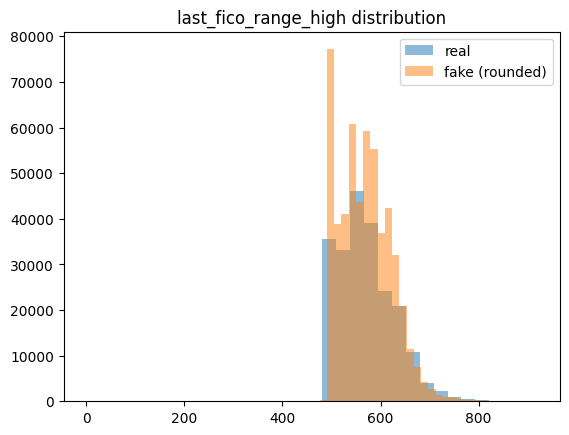

In [22]:
import matplotlib.pyplot as plt


plt.hist(label1_data.iloc[:, column_idx], bins=30, alpha=0.5, label="real")
plt.hist(fake.iloc[:, column_idx], bins=30, alpha=0.5, label="fake (rounded)")
plt.legend()
plt.title("last_fico_range_high distribution")
plt.show()


In [48]:
import numpy as np
import math
import pandas as pd

def rounding(fake: np.ndarray, real: pd.DataFrame, batch_size: int = 100000) -> np.ndarray:
    """
    모든 feature(연속형 + 범주형)에 대해 rounding을 수행하는 함수.

    Parameters:
    - fake (np.ndarray): 생성된 가짜 데이터 (n_samples, n_features)
    - real (pd.DataFrame): 원본 데이터 (복원 기준, DataFrame 형식)
    - batch_size (int): 배치 단위 처리 크기

    Returns:
    - fake (np.ndarray): 고유값으로 반올림된 가짜 데이터
    """
    if isinstance(real, np.ndarray):
        print("⚠️ Warning: real 데이터가 numpy 배열 → DataFrame으로 변환")
        real = pd.DataFrame(real)

    num_samples, num_features = fake.shape

    for col_idx in range(num_features):
        print(f"🔧 Rounding column {col_idx}...")

        # 고유값 정렬
        unique_values = np.sort(real.iloc[:, col_idx].dropna().unique())
        num_batches = math.ceil(num_samples / batch_size)

        for batch_idx in range(num_batches):
            start = batch_idx * batch_size
            end = min((batch_idx + 1) * batch_size, num_samples)

            batch = fake[start:end, col_idx]

            # 가장 가까운 값 인덱스 찾기
            indices = np.searchsorted(unique_values, batch, side="left")

            # 범위 초과 처리
            indices = np.clip(indices, 0, len(unique_values) - 1)

            fake[start:end, col_idx] = unique_values[indices]

    return fake


In [49]:
# 라운딩 대상 컬럼 이름
columns_to_round = ['loan_amnt', 'funded_amnt']

for col in columns_to_round:
    print(f"🔧 Rounding '{col}' ...")
    
    # fake에서 해당 column만 numpy로 추출 및 reshape
    fake_col = fake[col].to_numpy().reshape(-1, 1)
    
    # real 데이터에서 해당 컬럼만 추출 (DataFrame 형태로)
    real_col = label1_data[[col]]
    
    # 라운딩 수행
    rounded_col = rounding(fake_col, real_col)
    
    # fake DataFrame에 결과 반영
    fake[col] = rounded_col[:, 0]


🔧 Rounding 'loan_amnt' ...
🔧 Rounding column 0...
🔧 Rounding 'funded_amnt' ...
🔧 Rounding column 0...


In [7]:
fake['loan_amnt'].value_counts()

loan_amnt
10025.0    5501
10000.0    5257
10050.0    4832
9975.0     4391
10075.0    4219
           ... 
39750.0      28
39900.0      27
39625.0      26
39850.0      25
39975.0      20
Name: count, Length: 1483, dtype: int64

In [50]:
import numpy as np
import pandas as pd

# 예시: 해당 column index 찾기 (예를 들어 last_fico_range_high가 10번째 컬럼이라면 index=10)
column_idx = 0  # 바꿔야 함

# real 값은 DataFrame, fake 값은 numpy array
fake_col = fake.iloc[:, column_idx].to_numpy().reshape(-1, 1)
real_col = data.iloc[:, column_idx].to_frame()

# rounding
fixed_col = rounding(fake_col, real_col)

# 교체
fake.iloc[:, column_idx] = fixed_col[:, 0]



🔧 Rounding column 0...


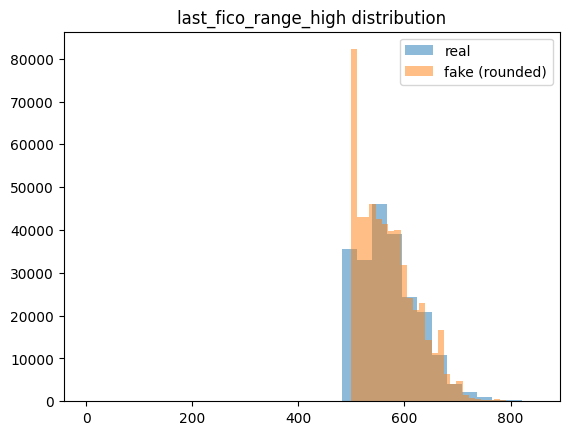

In [30]:
import matplotlib.pyplot as plt


plt.hist(label1_data.iloc[:, column_idx], bins=30, alpha=0.5, label="real")
plt.hist(fake.iloc[:, column_idx], bins=30, alpha=0.5, label="fake (rounded)")
plt.legend()
plt.title("last_fico_range_high distribution")
plt.show()


In [51]:
# real 데이터와 같은 컬럼명을 사용해서 fake 데이터를 DataFrame으로 변환
fake = pd.DataFrame(fake, columns=data.columns)

# 이제 각 컬럼에서 .unique() 사용 가능
print(fake['last_fico_range_high'].unique())

[584 534 669 544 609 519 499 619 679 524 614 589 564 579 639 644 569 634
 554 649 559 604 509 529 539 704 549 514 654 594 504 734 574 629 599 714
 664 624 674 659 719 764 689 769 759 709 724 694 699 729 684 774 794 749
 850 804 784 819 754 789 814 779 744 809 839 799 824 834 829 739 844]


In [52]:
"""output_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTAB-GAN/Fake_Datasets/generated_samples_postprocess.csv"
fake.to_csv(output_path, index=False)
print(f"✅ Final dataset saved to: {output_path}")"""

✅ Final dataset saved to: C:/Users/GCU/Lending_club/Data_Analysis_lending-club/VAE-CTAB-GAN/Fake_Datasets/generated_samples_postprocess.csv


In [32]:
#keep_features = ['grade', 'term_months', 'total_pymnt', 'total_pymnt_inv','total_il_high_credit_limit', 'loan_amnt']
keep_features = ['grade', 'total_pymnt', 'total_pymnt_inv', 'loan_amnt','funded_amnt']
data_classification = data.copy()
test_classification = test_data.copy()
fake_classification = fake.copy()

data_classification = data_classification.drop(columns = keep_features)
test_classification = test_classification.drop(columns = keep_features)
fake_classification = fake_classification.drop(columns = keep_features)

In [33]:
## data Encoding
Labelencoding_features = ['term_months', 'sub_grade']
onehot_features = ['debt_settlement_flag', 'home_ownership', 'purpose']

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

label_encoders = {}
for col in Labelencoding_features:
    le = LabelEncoder()
    data_classification[col] = le.fit_transform(data_classification[col])
    label_encoders[col] = le

# One-Hot Encoding
onehot_encoded = onehot_encoder.fit_transform(data_classification[onehot_features])
onehot_encoded_df = pd.DataFrame(
    onehot_encoded, 
    columns=onehot_encoder.get_feature_names_out(onehot_features),
    index=data_classification.index
)

# Merge
data_classification.drop(columns=onehot_features, inplace=True)
data_classification = pd.concat([data_classification, onehot_encoded_df], axis=1)

print("✅ Encoding 완료! 결과 shape:", data_classification.shape)

✅ Encoding 완료! 결과 shape: (1116458, 35)


In [34]:
##Fake data encoding
for col in Labelencoding_features:
    le = label_encoders[col]
    fake_classification[col] = le.transform(fake_classification[col])

# One-Hot Encoding (train에서 fit된 onehot_encoder 재사용)
onehot_encoded_test = onehot_encoder.transform(fake_classification[onehot_features])
onehot_encoded_test_df = pd.DataFrame(
    onehot_encoded_test,
    columns=onehot_encoder.get_feature_names_out(onehot_features),
    index=fake_classification.index
)

# Merge
fake_classification.drop(columns=onehot_features, inplace=True)
fake_classification = pd.concat([fake_classification, onehot_encoded_test_df], axis=1)

print("✅ 테스트 데이터 인코딩 완료! 결과 shape:", fake_classification.shape)

##Test data encoding
for col in Labelencoding_features:
    le = label_encoders[col]
    test_classification[col] = le.transform(test_classification[col])

# One-Hot Encoding (train에서 fit된 onehot_encoder 재사용)
onehot_encoded_test = onehot_encoder.transform(test_classification[onehot_features])
onehot_encoded_test_df = pd.DataFrame(
    onehot_encoded_test,
    columns=onehot_encoder.get_feature_names_out(onehot_features),
    index=test_classification.index
)

# Merge
test_classification.drop(columns=onehot_features, inplace=True)
test_classification = pd.concat([test_classification, onehot_encoded_test_df], axis=1)

print("✅ 테스트 데이터 인코딩 완료! 결과 shape:", test_classification.shape)

✅ 테스트 데이터 인코딩 완료! 결과 shape: (540000, 35)
✅ 테스트 데이터 인코딩 완료! 결과 shape: (744306, 35)


In [35]:
data_x = data_classification.drop(columns='loan_status')
data_y = data_classification[['loan_status']]

X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, train_size=0.8, test_size=0.2, random_state=42, stratify=data_y)

train_classification = pd.concat([X_train, y_train], axis=1)

In [36]:
from sklearn.utils import shuffle

train_data = pd.concat([train_classification, fake_classification])
train_data['loan_status'].value_counts()
train_data = shuffle(train_data, random_state=42)

In [37]:
X_train = train_data.drop(columns='loan_status')
y_train = train_data[['loan_status']]

X_test = test_classification.drop(columns='loan_status')
y_test = test_classification[['loan_status']]

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

model = XGBClassifier( 
    n_estimators=500,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

[0]	validation_0-logloss:0.68633	validation_1-logloss:0.68447
[1]	validation_0-logloss:0.67971	validation_1-logloss:0.67796
[2]	validation_0-logloss:0.67317	validation_1-logloss:0.67154
[3]	validation_0-logloss:0.66681	validation_1-logloss:0.66529
[4]	validation_0-logloss:0.66051	validation_1-logloss:0.65912
[5]	validation_0-logloss:0.65439	validation_1-logloss:0.65310
[6]	validation_0-logloss:0.64837	validation_1-logloss:0.64718
[7]	validation_0-logloss:0.64249	validation_1-logloss:0.64140
[8]	validation_0-logloss:0.63669	validation_1-logloss:0.63570
[9]	validation_0-logloss:0.63102	validation_1-logloss:0.63013
[10]	validation_0-logloss:0.62543	validation_1-logloss:0.62464
[11]	validation_0-logloss:0.61995	validation_1-logloss:0.61926
[12]	validation_0-logloss:0.61459	validation_1-logloss:0.61400
[13]	validation_0-logloss:0.60925	validation_1-logloss:0.60878
[14]	validation_0-logloss:0.60406	validation_1-logloss:0.60368
[15]	validation_0-logloss:0.59897	validation_1-logloss:0.59870
[1

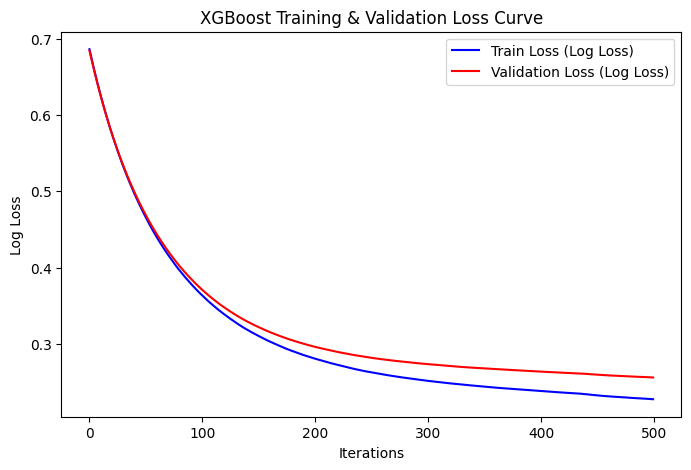

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    599114
           1       0.67      0.88      0.76    145192

    accuracy                           0.89    744306
   macro avg       0.82      0.89      0.85    744306
weighted avg       0.91      0.89      0.90    744306



In [39]:
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss 저장
    verbose=True
)

# 3️⃣ 학습 과정에서 저장된 Train & Validation Loss 가져오기
evals_result = model.evals_result()  # 🔹 변경된 코드 (학습 후 결과 확인)
train_loss = evals_result['validation_0']['logloss']  # Training Loss
val_loss = evals_result['validation_1']['logloss']    # Validation Loss

# 4️⃣ Train & Validation Loss 시각화
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss (Log Loss)', color='blue')
plt.plot(val_loss, label='Validation Loss (Log Loss)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training & Validation Loss Curve')
plt.legend()
plt.show()

# 5️⃣ 예측 및 평가
#y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRC에 필요

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# 🔹 Classification Report 출력
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred))

# 6️⃣ ROC Curve & AUC-ROC 계산
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)

# 7️⃣ Precision-Recall Curve & AU-PRC 계산
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_prc = auc(recall, precision)

In [40]:
from sklearn.metrics import confusion_matrix
# confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# 행: 실제값 (y_test), 열: 예측값 (y_pred)
# [[TP, FP],
#  [FN, TN]]
TN, FP, FN, TP= cm.ravel()

print("✅ Confusion Matrix")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

✅ Confusion Matrix
[[537209  61905]
 [ 17283 127909]]

True Positives (TP): 127909
False Positives (FP): 61905
True Negatives (TN): 537209
False Negatives (FN): 17283


In [41]:
fake['loan_amnt'].value_counts()

loan_amnt
10025.0    5501
10000.0    5257
10050.0    4832
9975.0     4391
10075.0    4219
           ... 
39750.0      28
39900.0      27
39625.0      26
39850.0      25
39975.0      20
Name: count, Length: 1483, dtype: int64

In [42]:
def encode_features(df, label_encoders, onehot_encoder, label_cols, onehot_cols):
    df = df.copy()
    
    # Label Encoding
    for col in label_cols:
        le = label_encoders[col]
        df[col] = le.transform(df[col])

    # One-Hot Encoding
    onehot_encoded = onehot_encoder.transform(df[onehot_cols])
    onehot_df = pd.DataFrame(
        onehot_encoded, 
        columns=onehot_encoder.get_feature_names_out(onehot_cols),
        index=df.index
    )

    df.drop(columns=onehot_cols, inplace=True)
    df = pd.concat([df, onehot_df], axis=1)
    
    return df

In [43]:
summary_with_sharpe = []

def linear_portfolio(top_10_indices):
    selected = test_data.loc[top_10_indices.index].copy()
    returns = (selected['total_pymnt_inv'] - selected['loan_amnt']) / selected['loan_amnt']
    
    avg_return = returns.mean()
    std_return = returns.std()
    sharpe_ratio = avg_return / std_return if std_return != 0 else np.nan

    summary_with_sharpe.append({
        'Average Return': avg_return * 100,
        'Std Dev': std_return,
        'Sharpe Ratio': sharpe_ratio
    }) 

In [44]:
drop2 = ['loan_status', 'return']

scaler = StandardScaler()
reg = LinearRegression()

fully_paid_indices = (y_pred == 0)
test_regression = test_data[fully_paid_indices]
test_regression['return'] = (test_regression['total_pymnt_inv'] - test_regression['funded_amnt'])/(test_regression['funded_amnt']+1e-8)

train_regression = data.copy()
train_regression['return'] = (train_regression['total_pymnt_inv'] - train_regression['funded_amnt'])/train_regression['funded_amnt']

drop_features = ['loan_status', 'total_pymnt_inv', 'total_pymnt','funded_amnt','grade','loan_amnt']
train_regression = train_regression.drop(columns=drop_features)
test_regression = test_regression.drop(columns=drop_features)

fake_regression = fake.copy()
#fake_regression = fake_regression[(fake_regression['loan_amnt'] > 0) & (fake_regression['funded_amnt'] > 0)]
fake_regression['return'] = (fake_regression['total_pymnt_inv'] - fake_regression['funded_amnt'])/fake_regression['funded_amnt']
fake_regression = fake_regression.drop(columns=drop_features)

train_total = pd.concat([train_regression, fake_regression])

########## Encoding categorical data ######################
train_total = encode_features(train_total, label_encoders, onehot_encoder, Labelencoding_features, onehot_features)
test_regression = encode_features(test_regression, label_encoders, onehot_encoder, Labelencoding_features, onehot_features)

data_x = train_total.drop(columns='return')
data_y = train_total[['return']]

test_x = test_regression.drop(columns = 'return')
test_y = test_regression[['return']]

data_x_scaled = scaler.fit_transform(data_x)

X_train = data_x_scaled
y_train = data_y

test_x_scaled = scaler.transform(test_x)

reg.fit(X_train, y_train)

#print(reg.coef_)
y_pred = reg.predict(test_x_scaled)

print("RMSE:", mean_squared_error(test_y, y_pred, squared=False))
print("R²:", r2_score(test_y, y_pred))

test_regression['predicted_return'] = reg.predict(test_x_scaled)
top_10_percent = test_regression.sort_values(by='predicted_return', ascending=False).head(int(len(test_regression)*0.1))

linear_portfolio(top_10_percent)

RMSE: 0.18929020984016978
R²: -0.2685555733186962


In [45]:
returns_with_sharpe_df = pd.DataFrame(summary_with_sharpe)

returns_with_sharpe_df.head()

,Average Return,Std Dev,Sharpe Ratio
0,15.694959,0.120651,1.300854
